In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

C:\Users\18234\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\18234\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\18234\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\18234\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\frame

images/停机坪.jpg


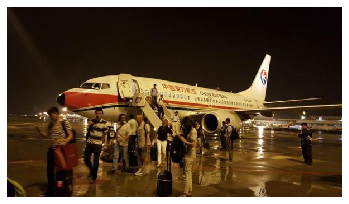

停机坪 (score = 0.89911)
机舱 (score = 0.02417)
游乐场 (score = 0.01591)
航站楼 (score = 0.01387)
流水线 (score = 0.00900)
艺术室 (score = 0.00894)
舞台 (score = 0.00880)
橄榄球场 (score = 0.00760)
冰场 (score = 0.00757)
棒球场 (score = 0.00503)

images/冰场.jpg


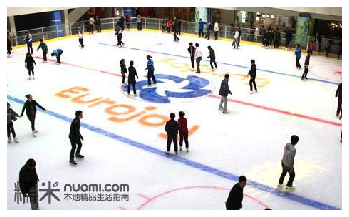

冰场 (score = 0.78029)
游乐场 (score = 0.04124)
航站楼 (score = 0.04071)
棒球场 (score = 0.02545)
停机坪 (score = 0.02499)
流水线 (score = 0.02392)
艺术室 (score = 0.02185)
橄榄球场 (score = 0.01700)
舞台 (score = 0.01602)
机舱 (score = 0.00853)

images/机舱.jpg


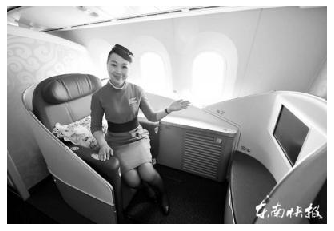

机舱 (score = 0.48408)
艺术室 (score = 0.12642)
游乐场 (score = 0.08097)
流水线 (score = 0.07654)
航站楼 (score = 0.07264)
舞台 (score = 0.05372)
停机坪 (score = 0.04434)
冰场 (score = 0.02641)
橄榄球场 (score = 0.02040)
棒球场 (score = 0.01449)

images/棒球场.jpg


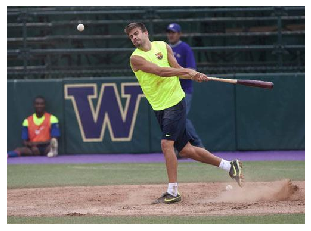

棒球场 (score = 0.61979)
橄榄球场 (score = 0.16329)
冰场 (score = 0.06775)
舞台 (score = 0.02990)
流水线 (score = 0.02677)
游乐场 (score = 0.02529)
航站楼 (score = 0.02238)
艺术室 (score = 0.01775)
停机坪 (score = 0.01614)
机舱 (score = 0.01093)

images/橄榄球场.jpg


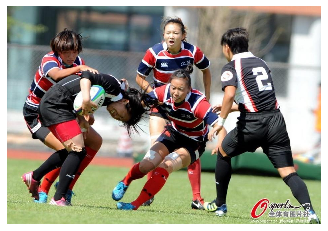

橄榄球场 (score = 0.90482)
棒球场 (score = 0.03139)
冰场 (score = 0.01147)
游乐场 (score = 0.01031)
停机坪 (score = 0.00875)
机舱 (score = 0.00765)
航站楼 (score = 0.00699)
流水线 (score = 0.00681)
艺术室 (score = 0.00640)
舞台 (score = 0.00542)

images/流水线.jpg


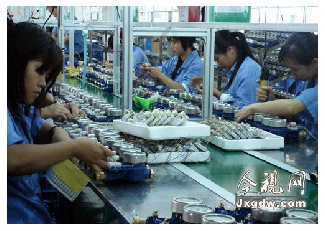

流水线 (score = 0.71104)
艺术室 (score = 0.15505)
航站楼 (score = 0.04694)
游乐场 (score = 0.03025)
机舱 (score = 0.01274)
舞台 (score = 0.01131)
棒球场 (score = 0.01043)
停机坪 (score = 0.00924)
冰场 (score = 0.00866)
橄榄球场 (score = 0.00435)

images/游乐场.jpg


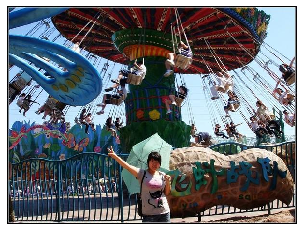

游乐场 (score = 0.80586)
冰场 (score = 0.02854)
艺术室 (score = 0.02765)
航站楼 (score = 0.02456)
流水线 (score = 0.02264)
舞台 (score = 0.02162)
停机坪 (score = 0.01872)
棒球场 (score = 0.01863)
橄榄球场 (score = 0.01760)
机舱 (score = 0.01417)

images/舞台.jpg


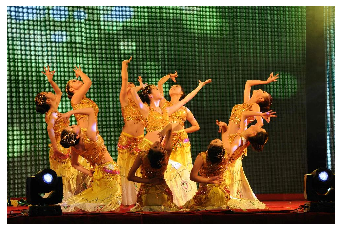

艺术室 (score = 0.20634)
游乐场 (score = 0.20043)
舞台 (score = 0.17287)
流水线 (score = 0.12049)
橄榄球场 (score = 0.08226)
航站楼 (score = 0.05498)
棒球场 (score = 0.05319)
冰场 (score = 0.04539)
机舱 (score = 0.03821)
停机坪 (score = 0.02584)

images/航站楼.jpg


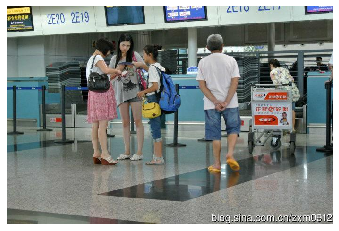

航站楼 (score = 0.79815)
流水线 (score = 0.06692)
舞台 (score = 0.03520)
冰场 (score = 0.03451)
机舱 (score = 0.01994)
游乐场 (score = 0.01481)
艺术室 (score = 0.01319)
棒球场 (score = 0.01208)
停机坪 (score = 0.00303)
橄榄球场 (score = 0.00216)

images/艺术室.jpg


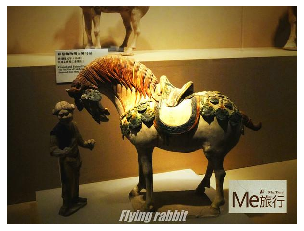

艺术室 (score = 0.39536)
游乐场 (score = 0.30684)
舞台 (score = 0.06883)
航站楼 (score = 0.04909)
流水线 (score = 0.04124)
棒球场 (score = 0.03255)
冰场 (score = 0.03004)
停机坪 (score = 0.02798)
橄榄球场 (score = 0.02467)
机舱 (score = 0.02339)



In [2]:
lines = tf.gfile.GFile('output_labels.txt').readlines()
uid_to_human = {}

# 一行一行读取数据
for uid,line in enumerate(lines) :
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line

# 分类编号变成描述
def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


# 创建一个图来存放训练好的模型
with tf.gfile.GFile('output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


with tf.Session() as sess:
    # final_result为输出tensor的名字
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    # 遍历目录
    for root,dirs,files in os.walk('images/'):
        for file in files:
            # 载入图片
            image_data = tf.gfile.GFile(os.path.join(root,file), 'rb').read()
            # 把图像数据传入模型获得模型输出结果
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})
            # 把结果转为1维数据
            predictions = np.squeeze(predictions)
            # 打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            # 显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # 排序
            top_k = predictions.argsort()[::-1]
            for node_id in top_k:     
                # 获取分类名称
                human_string = id_to_string(node_id)
                # 获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()